In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = r"Data\usupvi.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [5]:
df.shape

(303, 2)

In [6]:
df.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


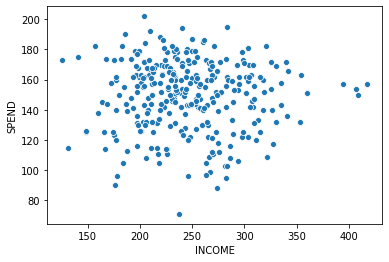

In [8]:
sns.scatterplot(df.INCOME, df.SPEND)

In [12]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
centroids = km.cluster_centers_
centroids

array([[265.58333333, 117.44444444],
       [193.93478261, 125.63043478],
       [301.07142857, 152.91071429],
       [195.05769231, 167.82692308],
       [242.03960396, 160.46534653],
       [365.58333333, 153.25      ]])

In [16]:
wcss = km.inertia_
print(centroids, wcss)

[[265.58333333 117.44444444]
 [193.93478261 125.63043478]
 [301.07142857 152.91071429]
 [195.05769231 167.82692308]
 [242.03960396 160.46534653]
 [365.58333333 153.25      ]] 158865.83467962776


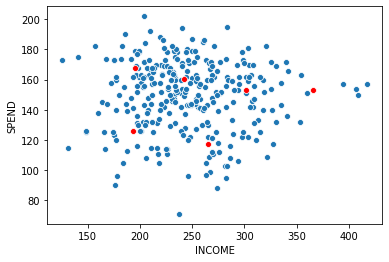

In [38]:
sns.scatterplot(df.INCOME, df.SPEND)
sns.scatterplot(centroids[:,0], centroids[:,1], color='red')

In [37]:
centroids[:,0]

array([265.58333333, 193.93478261, 301.07142857, 195.05769231,
       242.03960396, 365.58333333])

In [39]:
dist = []
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    dist.append(km.inertia_)

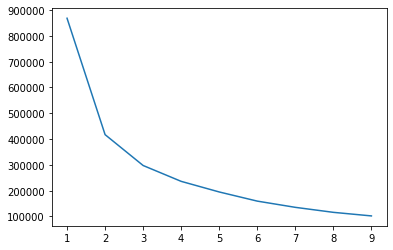

In [48]:
sns.lineplot(range(1,10),dist)

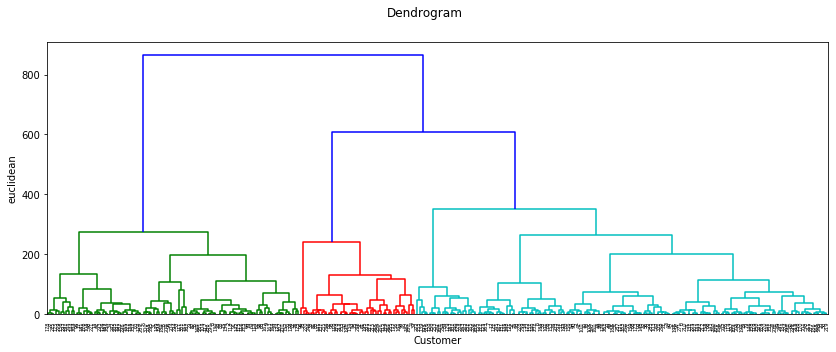

In [64]:
fig, ax = plt.subplots(figsize=[14,5])
dend = sch.dendrogram(sch.linkage(df, method='ward'), leaf_rotation=90, ax=ax)
fig.suptitle("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("euclidean")
plt.show()

# Assignment

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [66]:
path = "Data\customer segmentation.xlsx"

In [67]:
offers = pd.read_excel(path, sheet_name=0)
transactions = pd.read_excel(path, sheet_name=1)

In [71]:
transactions['n'] = 1

In [74]:
offers.head(1)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False


In [73]:
transactions.head(1)

,Customer Last Name,Offer #,n
0,Smith,2,1


In [78]:
df = pd.merge(transactions, offers)
df.head()

,Customer Last Name,Offer #,n,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,January,Pinot Noir,72,17,France,False
2,Martin,2,1,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,January,Pinot Noir,72,17,France,False


In [83]:
matrix = pd.pivot_table(df, index='Customer Last Name', values='n', columns='Offer #').fillna(0).reset_index()
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [85]:
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])

In [87]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [94]:
matrix.iloc[:,[0,-1]].groupby("cluster").count()

Offer #,Customer Last Name
cluster,
0,22
1,19
2,42
3,12
4,5


In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=2, random_state=0)

In [97]:
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]

In [99]:
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]

In [100]:
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,-1.852539,-0.461418
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.482911,0.184745
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.635888,1.045145
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-1.686992,-0.353476
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.467738,-0.452672


In [101]:
clusters = matrix.iloc[:,[0,33,34,35]]

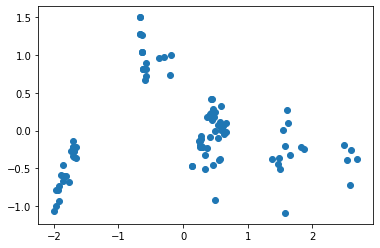

In [107]:
plt.scatter(x=clusters.x, y=clusters.y)

In [108]:
clusters.head(1)

Offer #,Customer Last Name,cluster,x,y
0,Adams,0,-1.852539,-0.461418


In [109]:
transactions.head(1)

,Customer Last Name,Offer #,n
0,Smith,2,1


In [111]:
data = pd.merge(transactions, clusters)
data.head()

,Customer Last Name,Offer #,n,cluster,x,y
0,Smith,2,1,1,-0.578766,0.813500
1,Smith,24,1,1,-0.578766,0.813500
2,Johnson,17,1,1,-0.665860,1.275206
3,Johnson,24,1,1,-0.665860,1.275206
4,Johnson,26,1,1,-0.665860,1.275206


In [112]:
offers.head(1)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False


In [114]:
data = pd.merge(data, offers)
data.head()

,Customer Last Name,Offer #,n,cluster,x,y,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,Smith,2,1,1,-0.578766,0.813500,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,1,-0.581324,0.890674,January,Pinot Noir,72,17,France,False
2,Martin,2,1,2,0.449740,0.416019,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,3,1.605140,0.276741,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,1,-0.632096,1.270729,January,Pinot Noir,72,17,France,False


In [121]:
champagne = {}

In [140]:
for cl in data['cluster'].unique():
    temp = data[data.cluster==cl]["Varietal"].value_counts()
    temp1 = temp.index[0]
    temp2 = temp.iloc[0]
    if temp1=="Champagne":
        champagne[cl] = temp2

In [146]:
import operator

In [151]:
cluster_champagne = max(champagne.items(), key=operator.itemgetter(1))[0]
print(cluster_champagne)

2


In [166]:
discount = {}

In [167]:
for cl in data['cluster'].unique():
    new_df = data[data.cluster==cl]
    counts = new_df[r"Discount (%)"].sum()/new_df.shape[0]
    discount[cl] = counts

In [169]:
cluster_discount = max(discount.items(), key=operator.itemgetter(1))[0]
print(cluster_discount)

4


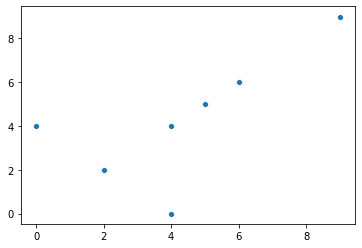

In [170]:
sns.scatterplot([2,4,6,0,4,5,9],[2,4,6,4,0,5,9])